/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)



Preselection

(3000, 2048)
-
1791
0.597
-
Object selection: knn

Dfmf

Parameters

18 18 4 2


auc: 0.6747495977143607

rmse: 1.063797231753875


-----



auc: 0.6747495977143607

Preselection

(3000, 2048)
-
1791
0.597
-
Object selection: knn

Dfmf

Parameters

10 10 8 6


auc: 0.6043548018924783

rmse: 1.3436463109850225


-----



auc: 0.6043548018924783

Preselection

(3000, 2048)
-
1791
0.597
-
Object selection: knn

Dfmf

Parameters

10 10 8 6


auc: 0.621563333550192

rmse: 1.3295088521292162


-----



auc: 0.621563333550192

Preselection

(3000, 2048)
-
1791
0.597
-
Object selection: knn

Dfmf

Parameters

10 10 8 6


auc: 0.628589509553365

rmse: 1.35307950312427


-----



auc: 0.628589509553365

Preselection

(3000, 2048)
-
1791
0.597
-
Object selection: knn

Dfmf

Parameters

10 10 8 6


auc: 0.5926814340993446

rmse: 1.3281607771994506


-----



auc: 0.5926814340993446

Preselection

(3000, 2048)
-
1791
0.597
-
Object selection: knn

Dfmf

Parameters

10 10 8 6


auc: 0

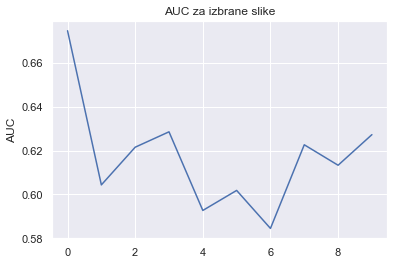

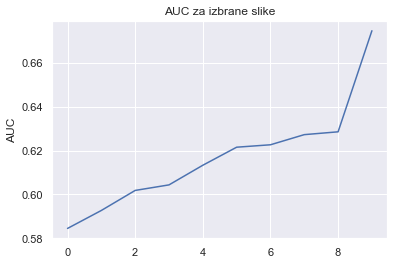

In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle

from utils import get_features, save_scores
from object_selection import ObjectSelection
from load_data import load_data
import matplotlib.pyplot as plt

# Parameters
data_directory = '../../data/generated-data-nr-2-n-6-4/'
features_path = '../../data/features-generated-data-nr-2-n-6-4'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = []
true_objects_indexes = [0, 1, 2, 3, 4, 5]
false_objects_indexes = [6, 7, 8, 9]

file_names = os.listdir(data_directory)
img_ids_vector = [int(name.split('-')[0]) for name in file_names]
ratings_vector = [int(name.split('-')[-2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]
images_indexes = [name.split('-')[3].split('.')[0] for name in file_names]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file,
                                                                             users_file, rating_thresholds, binary=True)

features = get_features(features_path, name_vector)

# K Nearest Neighbors
cv_results_file = '../results/cv-generated-data-nr-2-n-6-4-knn.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='knn')
    #selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix, users=users_matrix, cv_results_file=cv_results_file)
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector)
    selection.evaluate(evaluation_metric='auc')
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-6-4-knn.csv'
save_scores(scores, results_file)

Object selection: random

Dfmf

Parameters

18 16 2 4


rmse: 1.0539734228891962


-----



auc: 0.6798094930577979
Object selection: random

Dfmf

Parameters

14 10 8 6


rmse: 1.3171770707026715


-----



auc: 0.6489722222222222
Object selection: random

Dfmf

Parameters

14 10 8 6


rmse: 1.3294185549622144


-----



auc: 0.6090458700900467
Object selection: random

Dfmf

Parameters

14 10 8 6


rmse: 1.3382151273042735


-----



auc: 0.6109224849605458
Object selection: random

Dfmf

Parameters

14 10 8 6


rmse: 1.3333728635326634


-----



auc: 0.5738612469116333
Object selection: random

Dfmf

Parameters

14 10 8 6


rmse: 1.3491665639133754


-----



auc: 0.5923273785628261
Object selection: random

Dfmf

Parameters

14 10 8 6


rmse: 1.3363008443397801


-----



auc: 0.6271048649344796
Object selection: random

Dfmf

Parameters

14 10 8 6


rmse: 1.3510892334012825


-----



auc: 0.6218268128990014
Object selection: random

Dfmf

Parameters

14 10 8 6


rmse: 1.34267006

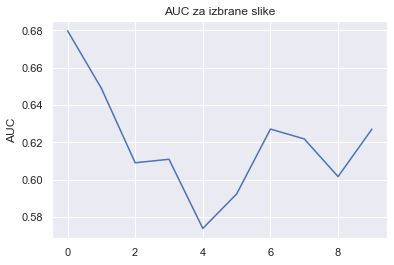

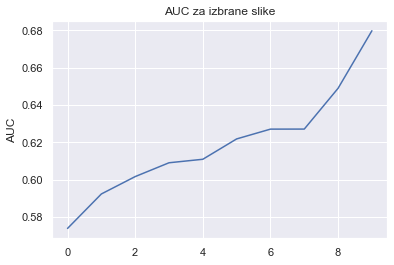

In [2]:
# Random selection
cv_results_file = '../results/cv-generated-data-nr-2-n-6-4-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector) 
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-6-4-random.csv'
save_scores(scores, results_file)


Preselection

(3000, 2048)
-
1835
0.6116666666666667
-
Object selection: rf

Dfmf

Parameters

16 18 6 2


rmse: 1.0665793649107915


-----



auc: 0.6829025781471941

Preselection

(3000, 2048)
-
1824
0.608
-
Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 1.4014902312943094


-----



auc: 0.6568815932169969

Preselection

(3000, 2048)
-
1818
0.606
-
Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 1.3958410726601334


-----



auc: 0.5932746536267318

Preselection

(3000, 2048)
-
1836
0.612
-
Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 1.3912253257601899


-----



auc: 0.6063979736321454

Preselection

(3000, 2048)
-
1836
0.612
-
Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 1.390522021957217


-----



auc: 0.6123273543771703

Preselection

(3000, 2048)
-
1826
0.6086666666666667
-
Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 1.424959529480537


-----



auc: 0.5793124739257405

Preselection

(3000, 2048)
-
1827
0.609
-
Obj

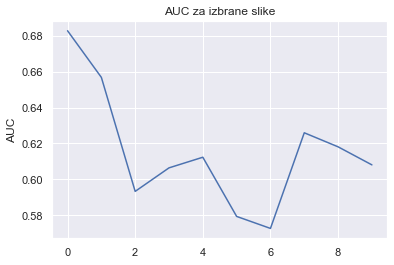

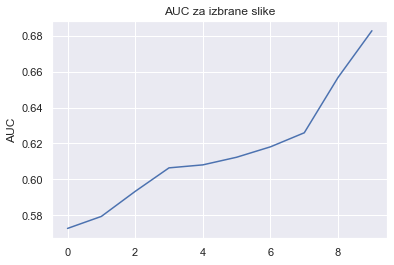

In [3]:


# Random forest
cv_results_file = '../results/cv-generated-data-r-2-n-6-4-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='rf')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector) 
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-6-4-rf.csv'
save_scores(scores, results_file)

In [4]:
from basic_factorization import BasicFactorization


cv_results_file = '../results/cv-generated-data-nr-2-n-6-4-knn.csv'
scores = []
for _ in range(10):
    selection = BasicFactorization(show_selection_results=True, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
results_file = '../scores/generated-data-nr-2-n-6-4-b.csv'
save_scores(scores, results_file)

Object selection: random

Dfmf

auc: 0.6623926049099145
Object selection: random

Dfmf

auc: 0.6673201189554308
Object selection: random

Dfmf

auc: 0.6803012280588954
Object selection: random

Dfmf

auc: 0.6741131370526767
Object selection: random

Dfmf

auc: 0.6653732894508921
Object selection: random

Dfmf

auc: 0.6733868312215168
Object selection: random

Dfmf

auc: 0.6557395516503323
Object selection: random

Dfmf

auc: 0.6500443944836799
Object selection: random

Dfmf

auc: 0.6668686631740819
Object selection: random

Dfmf

auc: 0.6616732487502788


In [5]:
from basic_factorization_nimfa import BasicFactorizationNmf


cv_results_file = '../results/cv-generated-data-nr-2-n-6-4-knn.csv'
scores = []
for _ in range(10):
    selection = BasicFactorizationNmf(show_selection_results=True, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
results_file = '../scores/generated-data-nr-2-n-6-4-bnmf.csv'
save_scores(scores, results_file)

Object selection: random

Dfmf

Parameters


auc: 0.5838589518271684
Object selection: random

Dfmf

Parameters


auc: 0.59912111615953
Object selection: random

Dfmf

Parameters


auc: 0.5801684298665121
Object selection: random

Dfmf

Parameters


auc: 0.6247994901202565
Object selection: random

Dfmf

Parameters


auc: 0.576402396263364
Object selection: random

Dfmf

Parameters


auc: 0.5693630676740595
Object selection: random

Dfmf

Parameters


auc: 0.589313598513729
Object selection: random

Dfmf

Parameters


auc: 0.5550471681158569
Object selection: random

Dfmf

Parameters


auc: 0.5508799318762418
Object selection: random

Dfmf

Parameters


auc: 0.5507993879273955
